# SQL Import

In [1]:
import pymysql
import pandas as pd

from dotenv import load_dotenv
from os import getenv

In [37]:
load_dotenv(dotenv_path = '.env')

True

In [38]:
getenv('host')

'learning-1000ml.c0zbrffehjje.us-east-2.rds.amazonaws.com'

In [39]:
conn = pymysql.connect(host = getenv('host'),
                       port = int(getenv('port')),
                       user = getenv('user'),
                       passwd = getenv('password'),
                       db = 'financial')

In [40]:
tables = ['account','card','client','disp','district','loan','order','trans']

for name in tables:

    table = pd.read_sql("select * from `%s`" % name, conn)
    table.to_csv('tables/%s.csv' % name, index = False)
    print(table.tail(2))
    print('')

      account_id  district_id         frequency        date
4498       11362           67  POPLATEK MESICNE  1995-10-14
4499       11382           74  POPLATEK MESICNE  1995-08-20

     card_id  disp_id     type      issued
890     1239    13442   junior  1998-02-02
891     1247    13660  classic  1995-06-13

      client_id gender  birth_date  district_id
5367      13971      F  1962-10-19           67
5368      13998      F  1953-08-12           74

      disp_id  client_id  account_id   type
5367    13663      13971       11362  OWNER
5368    13690      13998       11382  OWNER

    district_id       A2             A3      A4  A5  A6  A7  A8  A9   A10  \
75           76  Sumperk  north Moravia  127369  31  32  13   2   7  51.2   
76           77   Vsetin  north Moravia  148545   8  35  12   3   4  53.5   

     A11  A12   A13  A14     A15   A16  
75  8369  4.7  5.88  107  3736.0  2807  
76  8909  4.0  5.56  113  3460.0  3590  

     loan_id  account_id        date  amount  duration 

In [41]:
#Close connection
conn.close()

# Load in the Data

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [42]:
tables = ['account','card','client','disp','district','loan','order','trans']

for name in tables:
    exec("%s = pd.read_csv('tables/%s.csv')" % (name,name))

/home/steve/Desktop/Unit4_Project/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [43]:
account.tail(2)

,account_id,district_id,frequency,date
4498,11362,67,POPLATEK MESICNE,1995-10-14
4499,11382,74,POPLATEK MESICNE,1995-08-20


In [46]:
tables = ['account','card','client','disp','district','loan','order','trans']

for name in tables:
    

#     table = pd.read_sql("select * from `%s`" % name, conn)
#     table.to_csv('tables/%s.csv' % name, index = False)
    exec("print(%s.tail(2))" % name)
    print('')

      account_id  district_id         frequency        date
4498       11362           67  POPLATEK MESICNE  1995-10-14
4499       11382           74  POPLATEK MESICNE  1995-08-20

     card_id  disp_id     type      issued
890     1239    13442   junior  1998-02-02
891     1247    13660  classic  1995-06-13

      client_id gender  birth_date  district_id
5367      13971      F  1962-10-19           67
5368      13998      F  1953-08-12           74

      disp_id  client_id  account_id   type
5367    13663      13971       11362  OWNER
5368    13690      13998       11382  OWNER

    district_id       A2             A3      A4  A5  A6  A7  A8  A9   A10  \
75           76  Sumperk  north Moravia  127369  31  32  13   2   7  51.2   
76           77   Vsetin  north Moravia  148545   8  35  12   3   4  53.5   

     A11  A12   A13  A14     A15   A16  
75  8369  4.7  5.88  107  3736.0  2807  
76  8909  4.0  5.56  113  3460.0  3590  

     loan_id  account_id        date  amount  duration 

# EDA

* 682 loan_id
* 4500 account_id
* 892 card_id
* 5369 client_id
* 5369 disp_id
* 77 district_id
* 6471 order_id

<img src='https://relational.fit.cvut.cz/assets/img/datasets-generated/financial.svg' width='400'>

### Loan

In [83]:
#amount = duration * payments
loan.head()

,loan_id,account_id,date,amount,duration,payments,status,status2
0,4959,2,1994-01-05,80952,24,3373.0,A,A
1,4961,19,1996-04-29,30276,12,2523.0,B,B
2,4962,25,1997-12-08,30276,12,2523.0,A,A
3,4967,37,1998-10-14,318480,60,5308.0,D,D
4,4968,38,1998-04-19,110736,48,2307.0,C,C


In [91]:
loan.nunique()

loan_id       682
account_id    682
date          559
amount        645
duration        5
payments      577
status          4
status2         2
dtype: int64

In [76]:
# 'A' stands for contract finished, no problems,
# 'B' stands for contract finished, loan not payed,
# 'C' stands for running contract, OK so far,
# 'D' stands for running contract, client in debt
loan.status.value_counts()

C    403
A    203
D     45
B     31
Name: status, dtype: int64

In [88]:
loan['status2'] = loan.status

loan.loc[loan['status2']=='C','status2'] = 'A'
loan.loc[loan['status2']=='B','status2'] = 'D'

In [89]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status,status2
0,4959,2,1994-01-05,80952,24,3373.0,A,A
1,4961,19,1996-04-29,30276,12,2523.0,B,D
2,4962,25,1997-12-08,30276,12,2523.0,A,A
3,4967,37,1998-10-14,318480,60,5308.0,D,D
4,4968,38,1998-04-19,110736,48,2307.0,C,A


### Account

In [57]:
account.head(2)

,account_id,district_id,frequency,date
0,1,18,POPLATEK MESICNE,1995-03-24
1,2,1,POPLATEK MESICNE,1993-02-26


In [92]:
account.nunique()

account_id     4500
district_id      77
frequency         3
date           1535
dtype: int64

### Card

In [58]:
card.head(2)

,card_id,disp_id,type,issued
0,1,9,gold,1998-10-16
1,2,19,classic,1998-03-13


In [94]:
card.nunique()

card_id    892
disp_id    892
type         3
issued     607
dtype: int64

In [59]:
card.type.unique()

array(['gold', 'classic', 'junior'], dtype=object)

### Client

In [60]:
client.head(2)

,client_id,gender,birth_date,district_id
0,1,F,1970-12-13,18
1,2,M,1945-02-04,1


In [95]:
client.nunique()

client_id      5369
gender            2
birth_date     4738
district_id      77
dtype: int64

### Disp 

In [90]:
disp.tail(2)

,disp_id,client_id,account_id,type
5367,13663,13971,11362,OWNER
5368,13690,13998,11382,OWNER


In [96]:
disp.nunique()

disp_id       5369
client_id     5369
account_id    4500
type             2
dtype: int64

In [62]:
disp.type.unique()

array(['OWNER', 'DISPONENT'], dtype=object)

### District 

In [63]:
district.head(2)

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.6,1.85,132,2159.0,2674


In [64]:
district.nunique()

district_id    77
A2             77
A3              8
A4             77
A5             53
A6             36
A7             17
A8              6
A9             11
A10            70
A11            76
A12            41
A13            73
A14            44
A15            75
A16            76
dtype: int64

### Order

In [65]:
order.head(2)

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER


In [66]:
order.nunique()

order_id      6471
account_id    3758
bank_to         13
account_to    6446
amount        4412
k_symbol         4
dtype: int64

In [68]:
order.bank_to.unique()

array(['YZ', 'ST', 'QR', 'WX', 'CD', 'AB', 'UV', 'GH', 'IJ', 'KL', 'EF',
       'MN', 'OP'], dtype=object)

In [69]:
order.k_symbol.unique()

array(['SIPO', 'UVER', nan, 'POJISTNE', 'LEASING'], dtype=object)

### Trans

In [70]:
trans.head(2)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,PRIJEM,VKLAD,1000,1000,NaN,NaN,NaN
1,5,1,1995-04-13,PRIJEM,PREVOD Z UCTU,3679,4679,NaN,AB,41403269.0


In [71]:
trans.nunique()

trans_id      1056320
account_id       4500
date             2191
type                3
operation           5
amount          35890
balance        111042
k_symbol            8
bank               13
account          7665
dtype: int64

In [72]:
trans.type.unique()

array(['PRIJEM', 'VYDAJ', 'VYBER'], dtype=object)

In [73]:
trans.operation.unique()

array(['VKLAD', 'PREVOD Z UCTU', 'PREVOD NA UCET', 'VYBER',
       'VYBER KARTOU', nan], dtype=object)

In [74]:
trans.k_symbol.unique()

array([nan, 'SIPO', 'SLUZBY', 'UVER', ' ', 'POJISTNE', 'DUCHOD', 'UROK',
       'SANKC. UROK'], dtype=object)

In [75]:
trans.bank.unique()

array([nan, 'AB', 'YZ', 'ST', 'QR', 'WX', 'CD', 'UV', 'KL', 'GH', 'OP',
       'IJ', 'EF', 'MN'], dtype=object)

## Plots

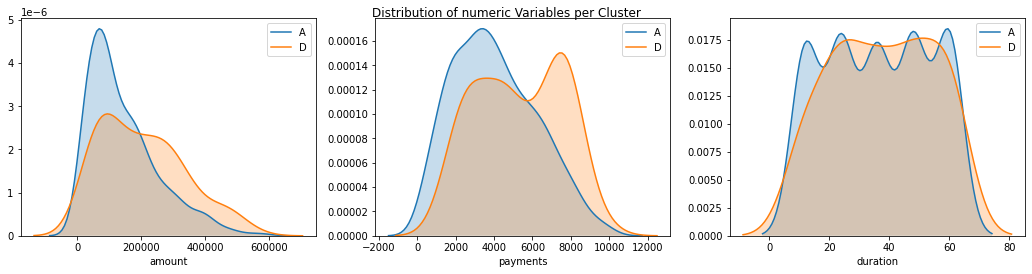

In [147]:
columns = ['amount','payments','duration']

fig, axs = plt.subplots(1,3, figsize=(18,4))

for column, ax in zip(columns, axs.flatten()):
     for each in ['A','D']:
        sns.kdeplot(loan[column][loan['status2']==each],ax=ax,label=each,shade=True)
        ax.set_xlabel(column)

plt.suptitle('Distribution of numeric Variables per Cluster', y=0.92)
plt.show()



In [121]:
loan.head(2)

,loan_id,account_id,date,amount,duration,payments,status,status2
0,4959,2,1994-01-05,80952,24,3373.0,A,A
1,4961,19,1996-04-29,30276,12,2523.0,B,D


In [122]:
account.head(2)

,account_id,district_id,frequency,date
0,1,18,POPLATEK MESICNE,1995-03-24
1,2,1,POPLATEK MESICNE,1993-02-26


In [127]:
loan_account = loan.merge(account,on='account_id',suffixes=('_loan','_account'))
loan_account

,loan_id,account_id,date_loan,amount,duration,payments,status,status2,district_id,frequency,date_account
0,4959,2,1994-01-05,80952,24,3373.0,A,A,1,POPLATEK MESICNE,1993-02-26
1,4961,19,1996-04-29,30276,12,2523.0,B,D,21,POPLATEK MESICNE,1995-04-07
2,4962,25,1997-12-08,30276,12,2523.0,A,A,68,POPLATEK MESICNE,1996-07-28
3,4967,37,1998-10-14,318480,60,5308.0,D,D,20,POPLATEK MESICNE,1997-08-18
4,4968,38,1998-04-19,110736,48,2307.0,C,A,19,POPLATEK TYDNE,1997-08-08
...,...,...,...,...,...,...,...,...,...,...,...
677,7294,11327,1998-09-27,39168,24,1632.0,C,A,7,POPLATEK MESICNE,1997-10-15
678,7295,11328,1998-07-18,280440,60,4674.0,C,A,54,POPLATEK MESICNE,1996-11-05
679,7304,11349,1995-10-29,419880,60,6998.0,C,A,1,POPLATEK TYDNE,1995-05-26
680,7305,11359,1996-08-06,54024,12,4502.0,A,A,61,POPLATEK MESICNE,1994-10-01


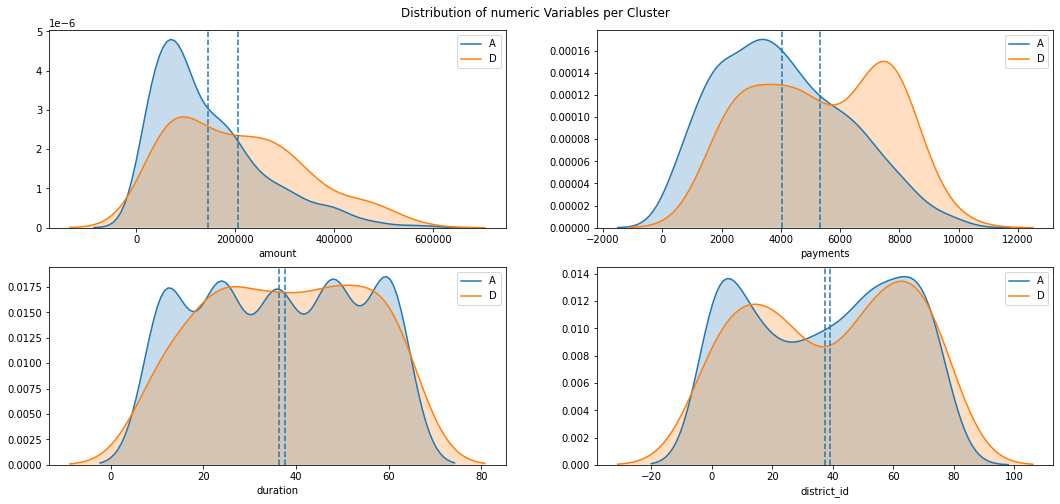

In [145]:
columns = ['amount','payments','duration','district_id']

fig, axs = plt.subplots(2,2, figsize=(18,8))

for column, ax in zip(columns, axs.flatten()):
     for each in ['A','D']:
        sns.kdeplot(loan_account[column][loan['status2']==each],ax=ax,label=each,shade=True)
        ax.axvline(loan_account[column][loan['status2']==each].mean(),ls='--')
        ax.set_xlabel(column)

plt.suptitle('Distribution of numeric Variables per Cluster', y=0.92)
plt.show()

In [156]:
loan_order = loan.merge(order,on='account_id',suffixes=('_loan','_order'))
loan_order

,loan_id,account_id,date,amount_loan,duration,payments,status,status2,order_id,bank_to,account_to,amount_order,k_symbol
0,4959,2,1994-01-05,80952,24,3373.0,A,A,29402,ST,89597016,3372.7,UVER
1,4959,2,1994-01-05,80952,24,3373.0,A,A,29403,QR,13943797,7266.0,SIPO
2,4961,19,1996-04-29,30276,12,2523.0,B,D,29423,QR,14132368,2523.2,UVER
3,4962,25,1997-12-08,30276,12,2523.0,A,A,29431,YZ,1301700,2523.2,UVER
4,4962,25,1997-12-08,30276,12,2523.0,A,A,29432,IJ,4896235,6817.0,SIPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,7308,11362,1996-12-27,129408,24,5392.0,A,A,46334,YZ,70641225,4780.0,SIPO
1509,7308,11362,1996-12-27,129408,24,5392.0,A,A,46335,MN,78507822,56.0,NaN
1510,7308,11362,1996-12-27,129408,24,5392.0,A,A,46336,ST,40799850,330.0,POJISTNE
1511,7308,11362,1996-12-27,129408,24,5392.0,A,A,46337,KL,20009470,129.0,NaN


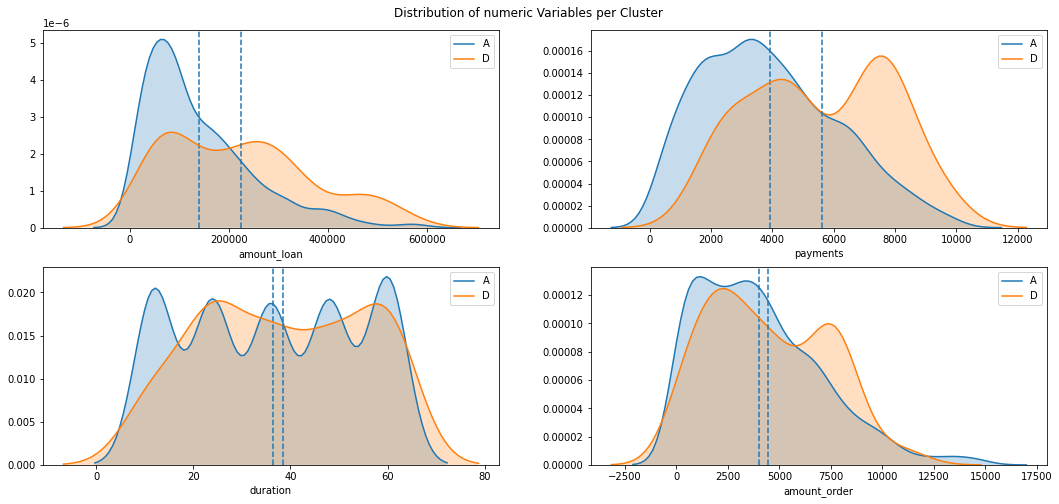

In [166]:
columns = ['amount_loan','payments','duration','amount_order']

fig, axs = plt.subplots(2,2, figsize=(18,8))

for column, ax in zip(columns, axs.flatten()):
     for each in ['A','D']:
        sns.kdeplot(loan_order[column][loan_order['status2']==each],ax=ax,label=each,shade=True)
        ax.axvline(loan_order[column][loan_order['status2']==each].mean(),ls='--')
        ax.set_xlabel(column)

plt.suptitle('Distribution of numeric Variables per Cluster', y=0.92)
plt.show()